In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Análise Exploratória

### Carregar e visualizar as primeiras linhas dos dados

In [2]:
laptop_price = pd.read_pickle("../../datasets/processed/laptop_price.pkl")
laptop_price.head()

,company,product,typename,inches,screen_resolution,cpu_manufacturer,cpu,gpu_manufacturer,gpu,ram_gb,hdd_gb,ssd_gb,hybrid_gb,flash_storage_gb,opsys,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel,Intel Core i5 2.3GHz,Intel,Intel Iris Plus Graphics 640,8,0,128,0,0,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Intel Core i5 1.8GHz,Intel,Intel HD Graphics 6000,8,0,0,0,128,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,1920x1080,Intel,Intel Core i5 7200U 2.5GHz,Intel,Intel HD Graphics 620,8,0,256,0,0,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel,Intel Core i7 2.7GHz,AMD,AMD Radeon Pro 455,16,0,512,0,0,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel,Intel Core i5 3.1GHz,Intel,Intel Iris Plus Graphics 650,8,0,256,0,0,macOS,1.37,1803.60


### Verificar quantidade de valores únicos

In [3]:
print("Quantidade de Valores únicos por coluna")
for column in laptop_price.columns:
    print(f"{column}: {len(laptop_price[column].unique())}")

Quantidade de Valores únicos por coluna
company: 19
product: 618
typename: 6
inches: 18
screen_resolution: 15
cpu_manufacturer: 3
cpu: 118
gpu_manufacturer: 4
gpu: 110
ram_gb: 9
hdd_gb: 6
ssd_gb: 13
hybrid_gb: 3
flash_storage_gb: 7
opsys: 9
weight_kg: 171
price_euros: 791


### Função para criar gráfico de barra de média de preço

In [4]:
def create_bar(x, x_label, rotation=0):
    df_groupred = laptop_price.groupby(by=x, as_index=False)['price_euros'].mean()

    fig = plt.figure(figsize=(16, 6))
    sns.barplot(x=x, y='price_euros', data=df_groupred)
    plt.xlabel(x_label, fontsize='large', family='monospace')
    plt.ylabel("Preço (€)", fontsize='large',family='monospace')
    plt.xticks(rotation=rotation, size=12)
    plt.yticks(size=12)

    plt.title(f"Média de Preço dos Notebooks por {x_label.capitalize()}", fontsize='large', fontweight='bold', 
            style='italic', family='monospace')
    plt.show() 

### Verificar média de preço por marca

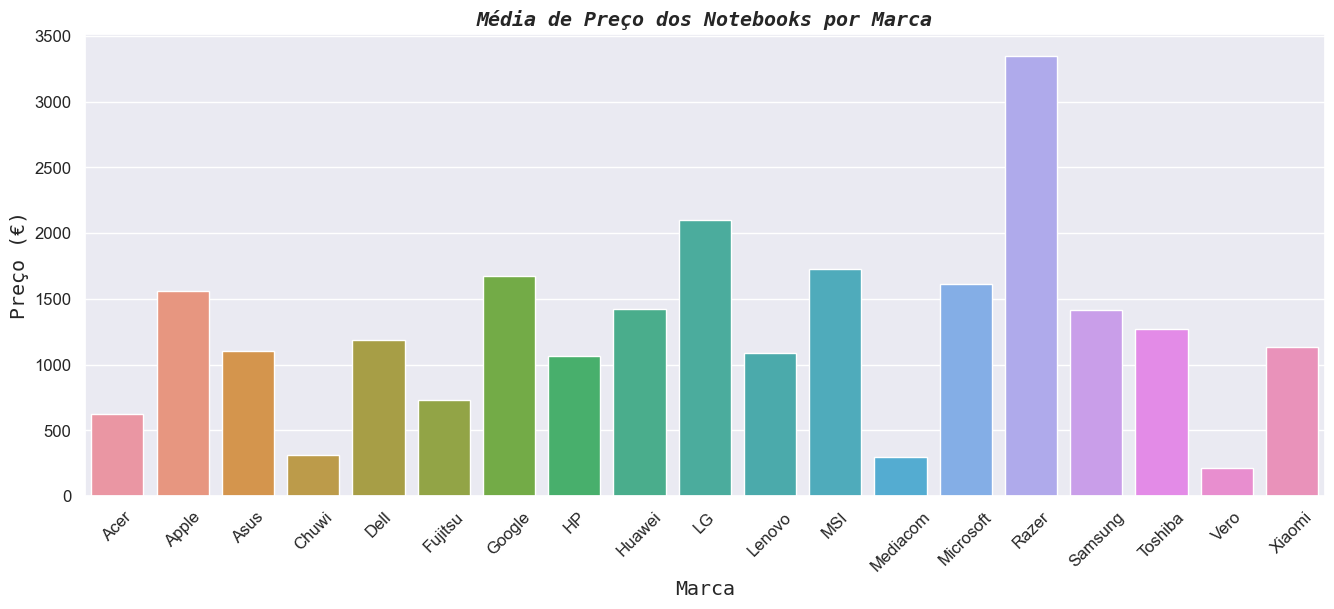

In [5]:
create_bar('company', 'Marca', 45)

### Verificar média de preço por tipo

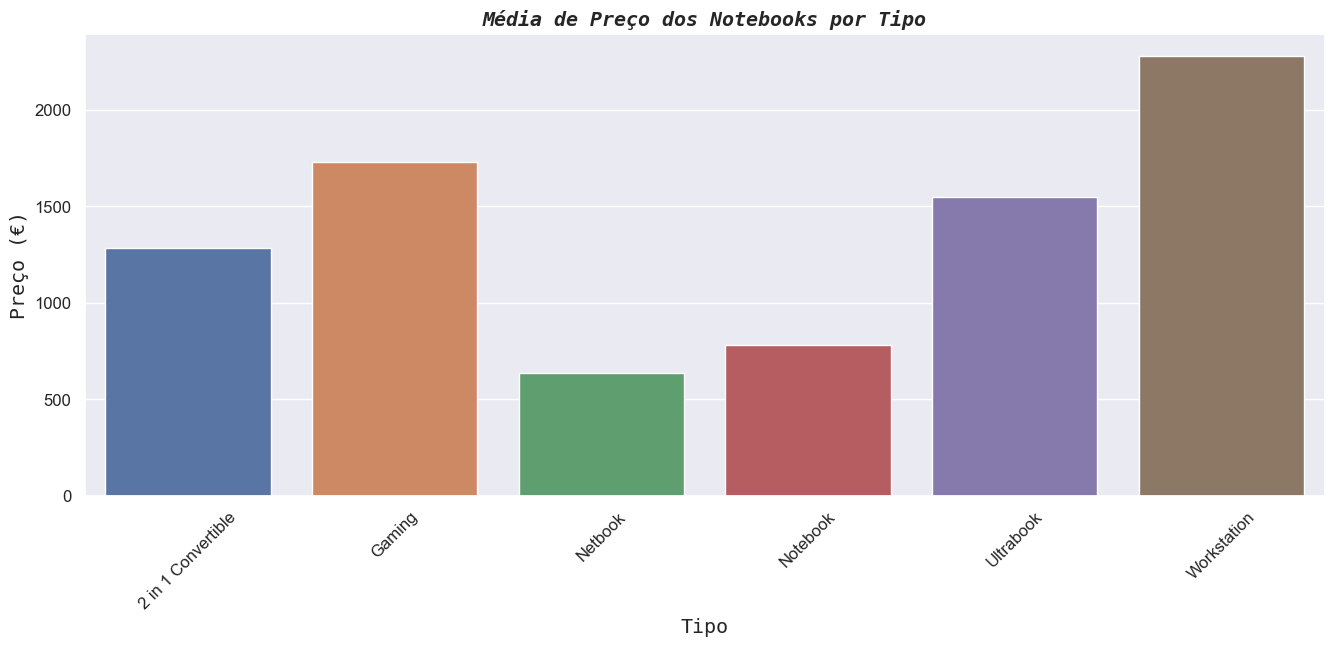

In [6]:
create_bar('typename', 'Tipo', 45)

### Verificar média de preço por quantidade de ram

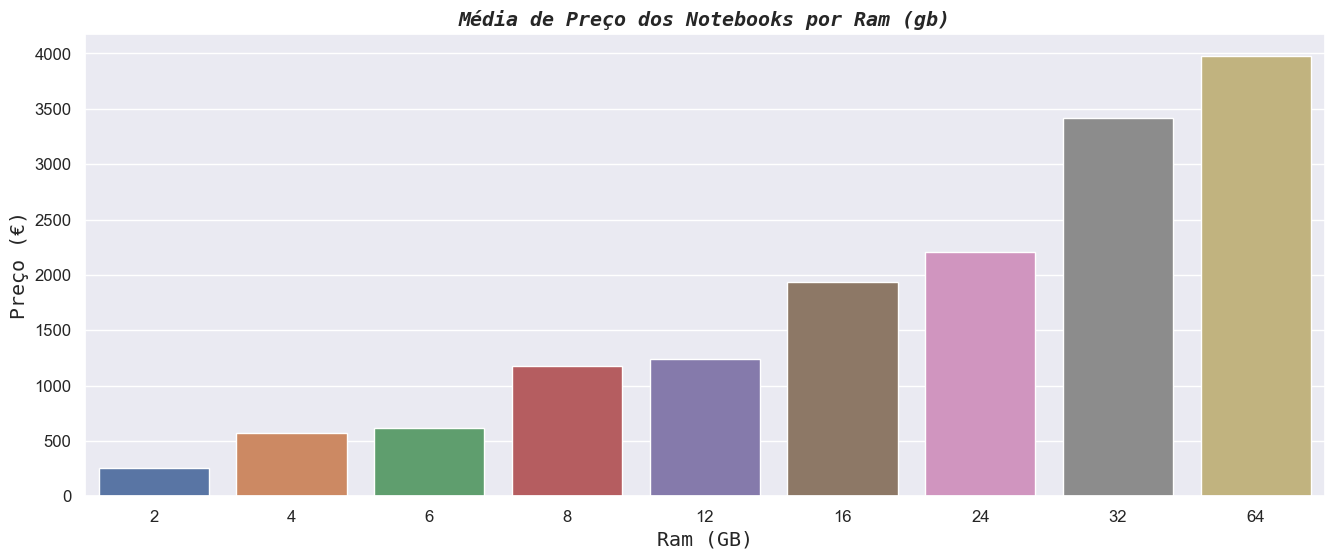

In [7]:
create_bar('ram_gb', 'Ram (GB)', 0)

### Verificar média de preço por sistema operacional

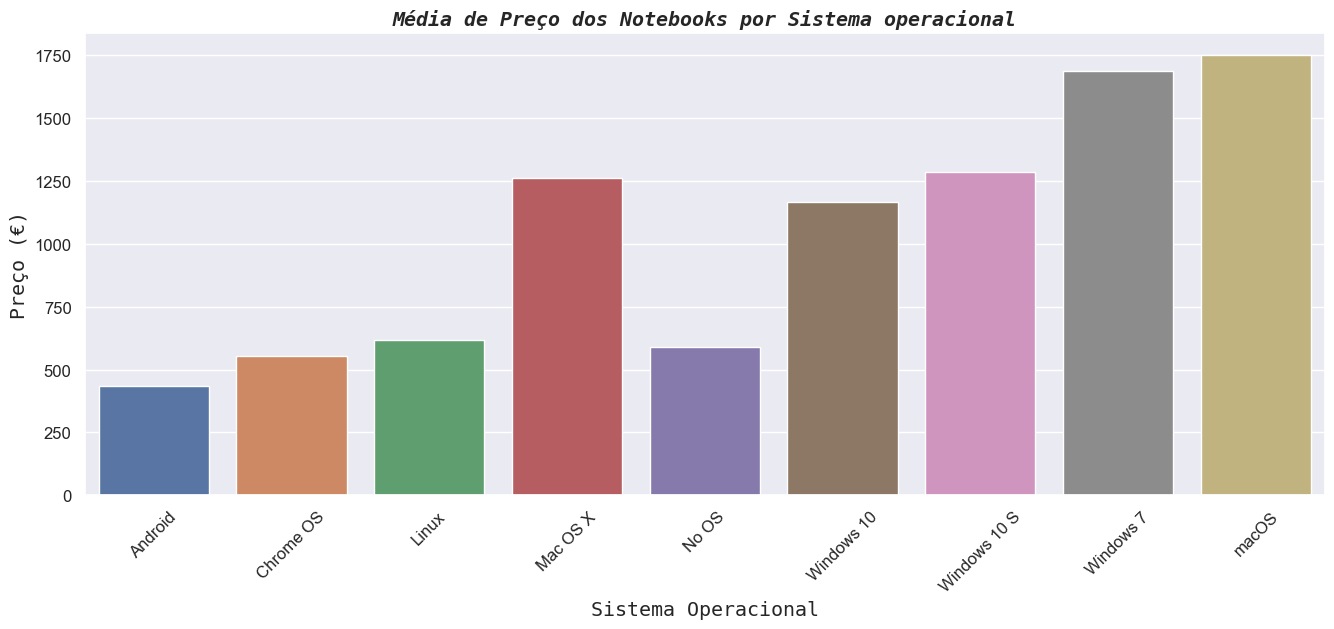

In [8]:
create_bar('opsys', 'Sistema Operacional', 45)

### Verificar média de preço por tipo de armazenamento

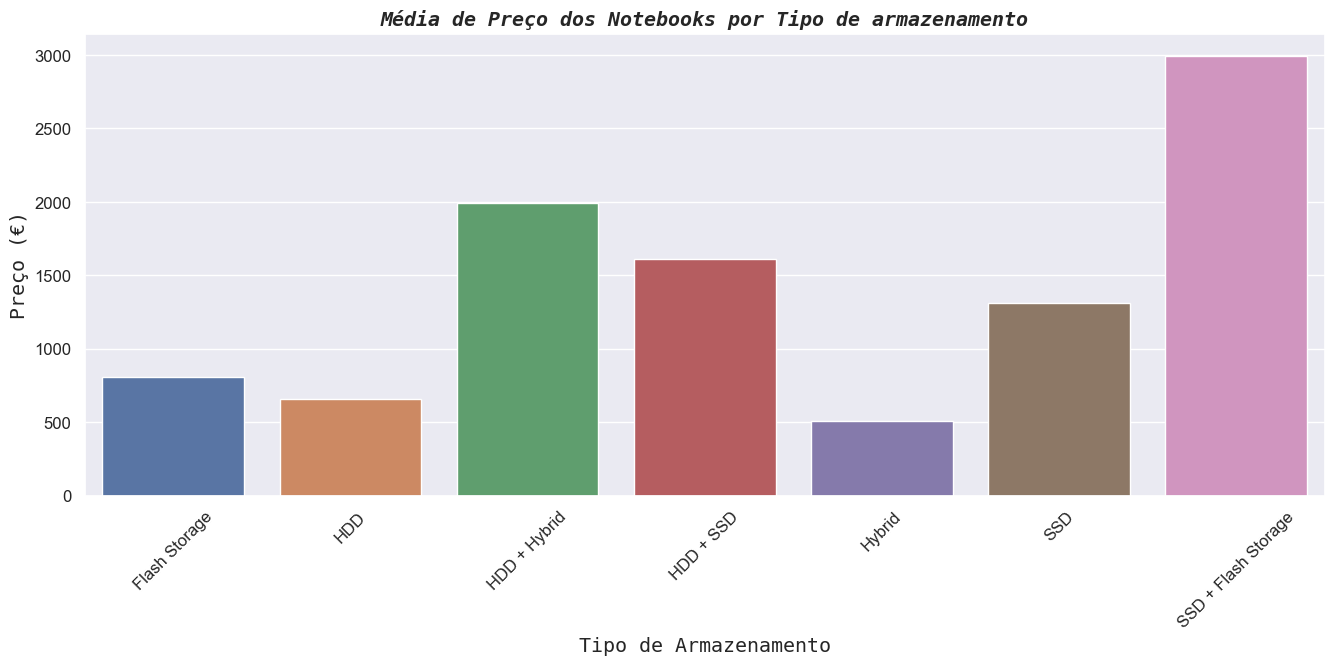

In [9]:
storage_type = []

for hdd, ssd, flash_storage, hybrid in zip(laptop_price['hdd_gb'], laptop_price['ssd_gb'], 
                                           laptop_price['hybrid_gb'], laptop_price['flash_storage_gb']):

    new_storage = ''
    itens = [hdd, ssd, flash_storage, hybrid]
    names = ['HDD', 'SSD', 'Flash Storage', 'Hybrid']
    
    for item, name in zip(itens, names):
        if item !=0:
            new_storage += " + " + name
            
    new_storage = new_storage.replace(" + ", "", 1)
    storage_type.append(new_storage)

laptop_price['storage_type'] = storage_type
create_bar('storage_type', 'Tipo de Armazenamento', 45)

### Verificar média de preço por polegadas

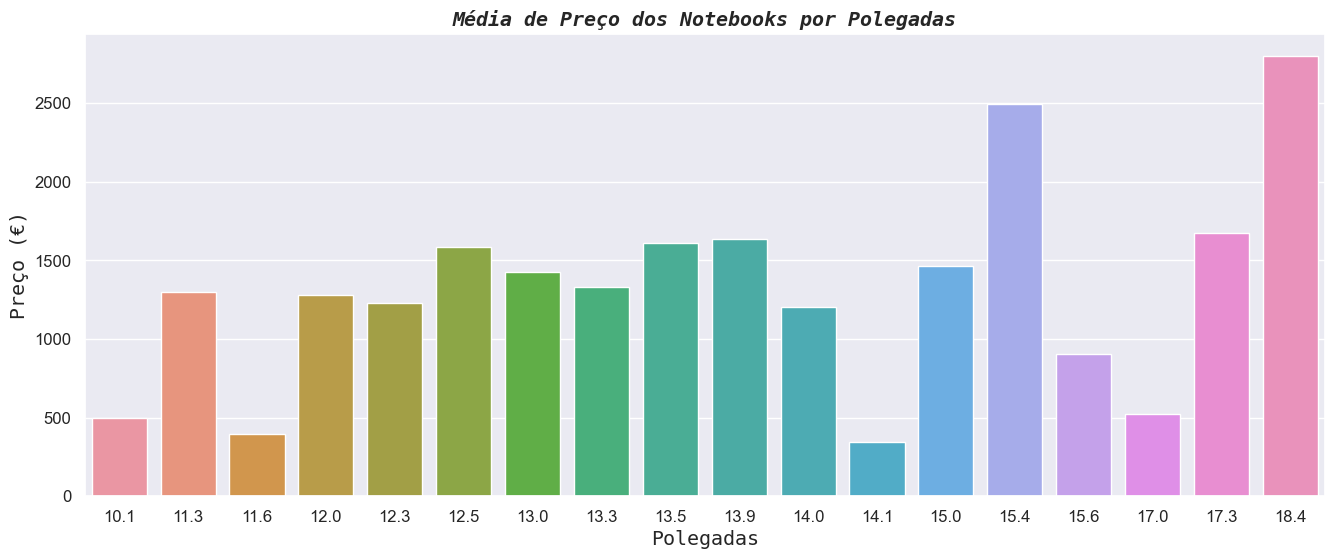

In [10]:
create_bar('inches', 'Polegadas', 0)

### Verificar média de preço por resolução da tela

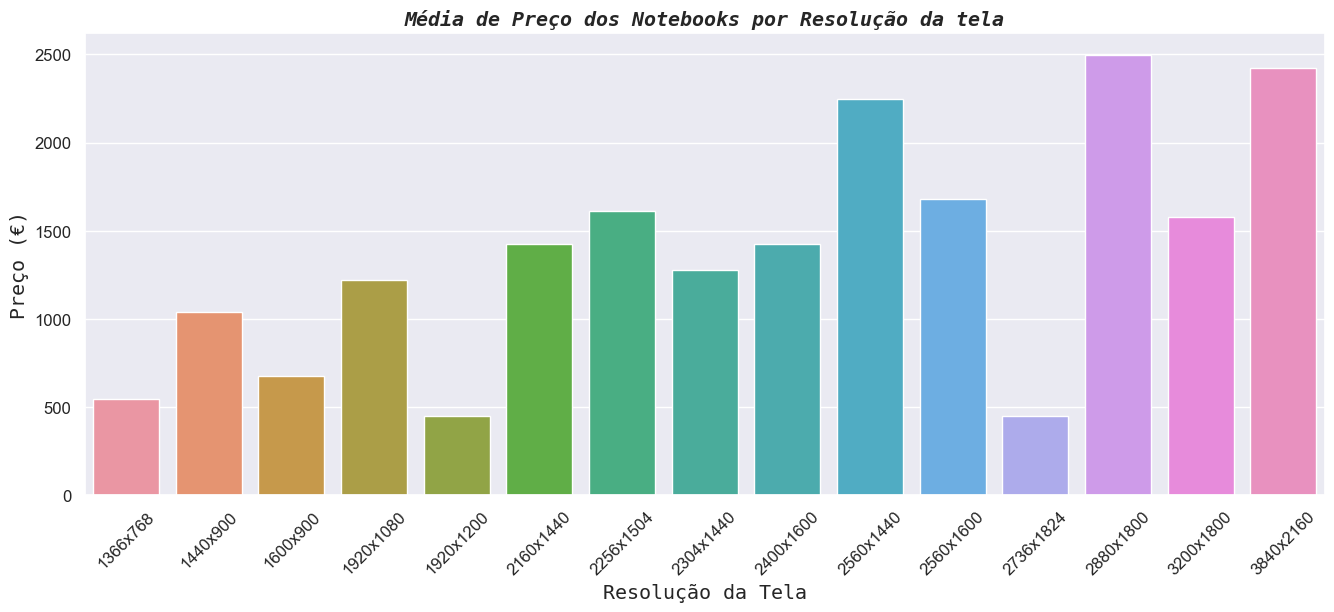

In [11]:
create_bar('screen_resolution', 'Resolução da Tela', 45)

### Verificar média de preço por fabricante da CPU

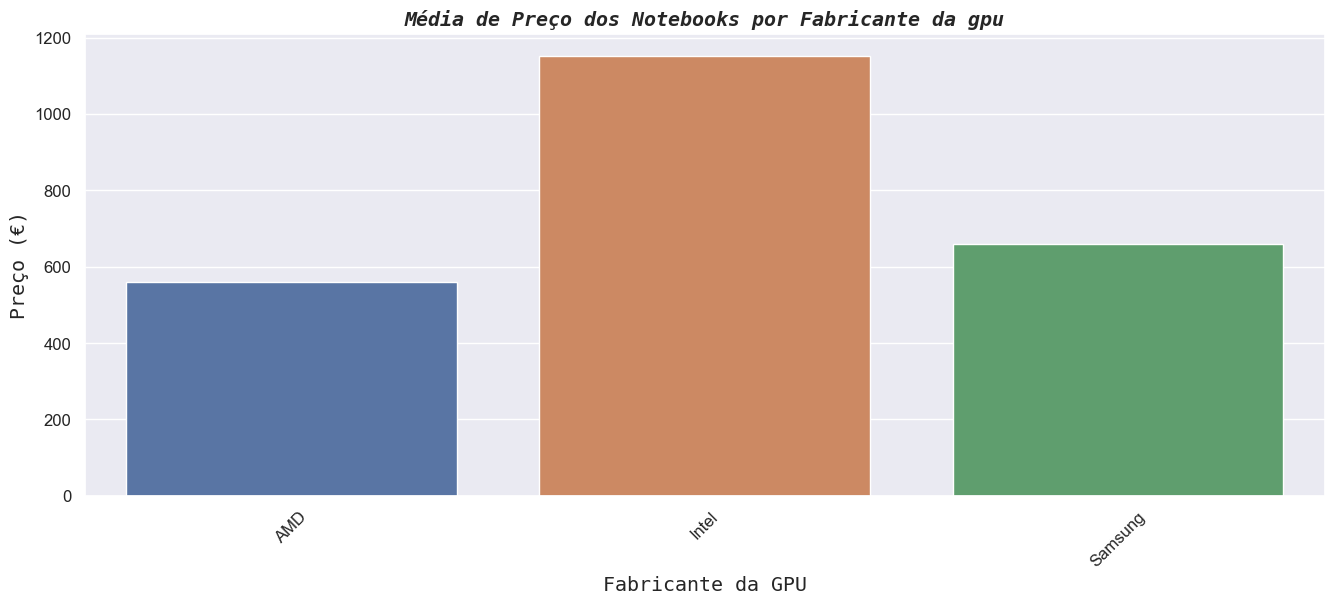

In [12]:
create_bar('cpu_manufacturer', 'Fabricante da GPU', 45)

### Verificar média de preço por fabricante da GPU

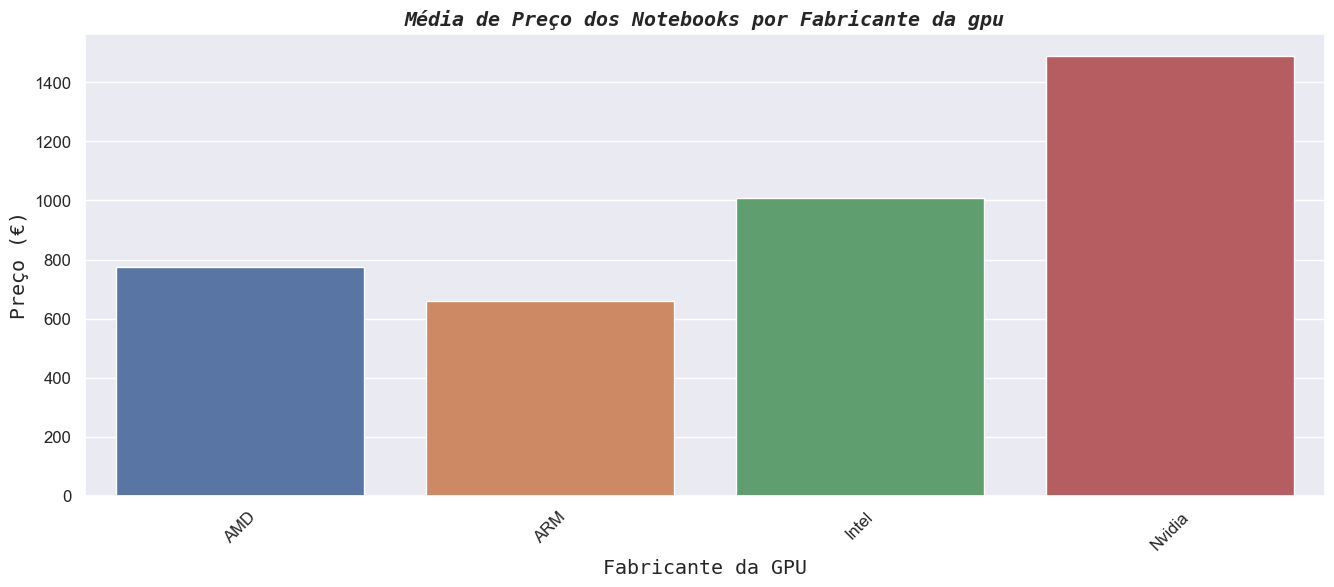

In [13]:
create_bar('gpu_manufacturer', 'Fabricante da GPU', 45)

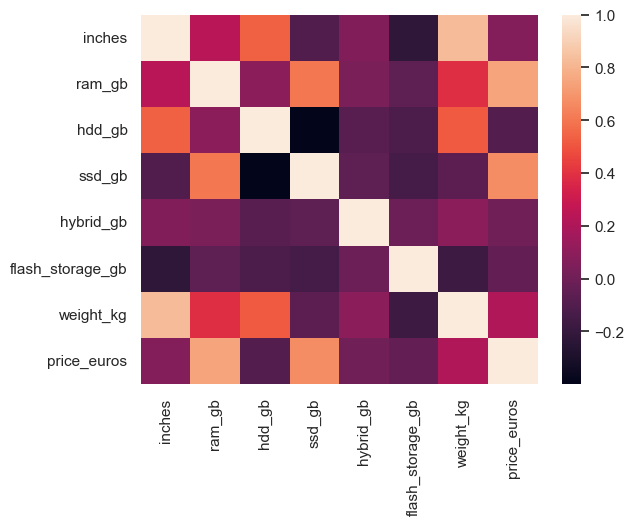

In [18]:
corr = laptop_price.corr()

sns.heatmap(data=corr)
plt.show()